<a href="https://colab.research.google.com/github/Yuliana2905/Laboratorio-numero-1-Procesamiento-de-se-ales/blob/main/Laboratorio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
#Descarga de librerias
!pip install wfdb
!pip install numpy matplotlib scipy pandas



#laboratorio 1 Analisis estadistico de la señal


In [17]:
#Llamado de librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import wfdb
import scipy.stats as stats

# PARTE A

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
signals, fields = wfdb.rdsamp('/content/drive/MyDrive/Colab Notebooks/121001_ECG')

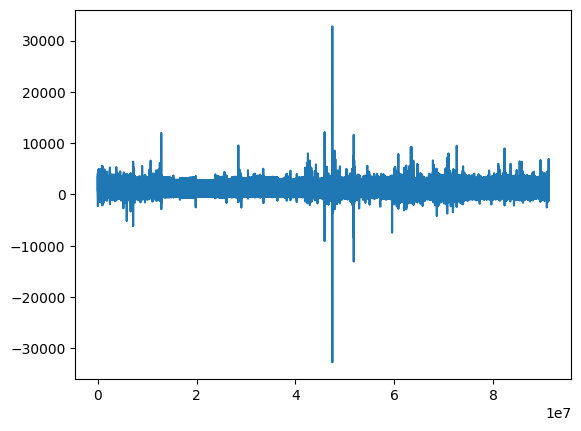

In [24]:
plt.plot(signals)
plt.show()


In [25]:
fields

{'fs': 1000,
 'sig_len': 91233000,
 'n_sig': 1,
 'base_date': None,
 'base_time': None,
 'units': ['uV'],
 'sig_name': ['ECG'],
 'comments': ['ECG']}

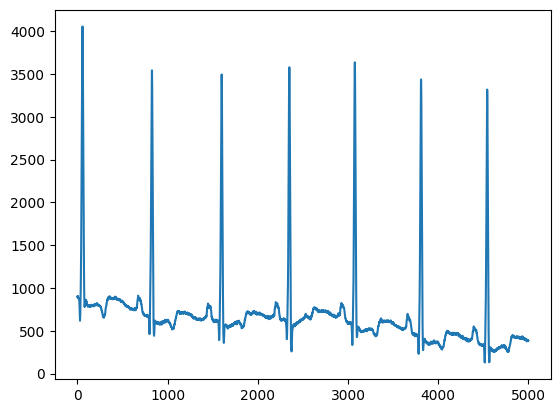

In [38]:
señal=signals[1000:6000]
plt.plot(señal)


In [87]:
N=len(señal)
suma=0
for valor in señal:
    suma+=valor
media_señal=suma/N
suma_cuadrads=0
for valor in señal:
    suma+=(valor-media_señal)**2
desv_manual=(suma/(N-1))**0.5
coef_var_manual=(desv_manual/media_señal)*100
suma_var=0
for valor in señal:
    suma_var+=(valor-media_señal)**2
varianza=suma_var/N
suma_curtosis=0
for valor in señal:
    suma_curtosis+=(valor-media_señal)**4
curtosis=(suma_curtosis/N)/(varianza**2)

print("Estadística")
print(f"Media:{media_señal}")
print(f"Desviación estándar:{desv_manual}")
print(f"Coeficiente de variación (%):{coef_var_manual}")
print(f"Curtosis:{curtosis}")

Estadística
Media:[670.31880638]
Desviación estándar:[434.27397697]
Coeficiente de variación (%):[64.78618425]
Curtosis:[27.92048673]


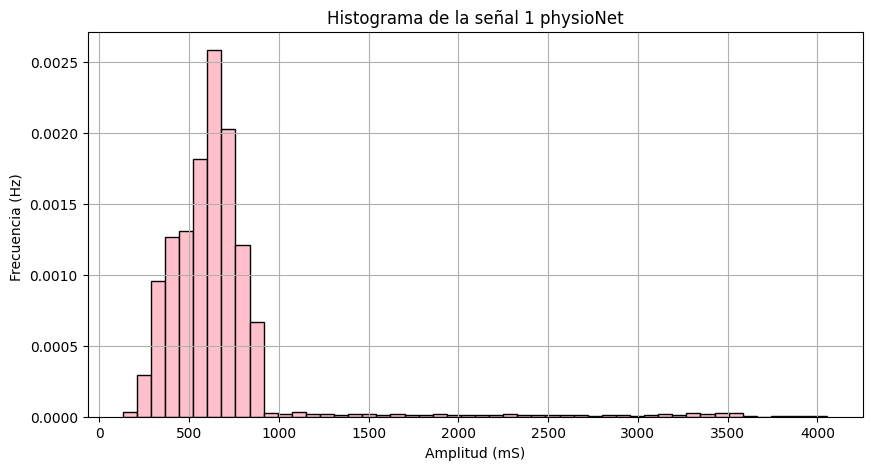

In [35]:
plt.figure(figsize=(10,5))
plt.hist(señal, bins=50, color='pink', edgecolor='black', density=True)
plt.title("Histograma de la señal 1 physioNet")
plt.xlabel("Amplitud (mS)")
plt.ylabel("Frecuencia (Hz)")
plt.grid(True)
plt.show()

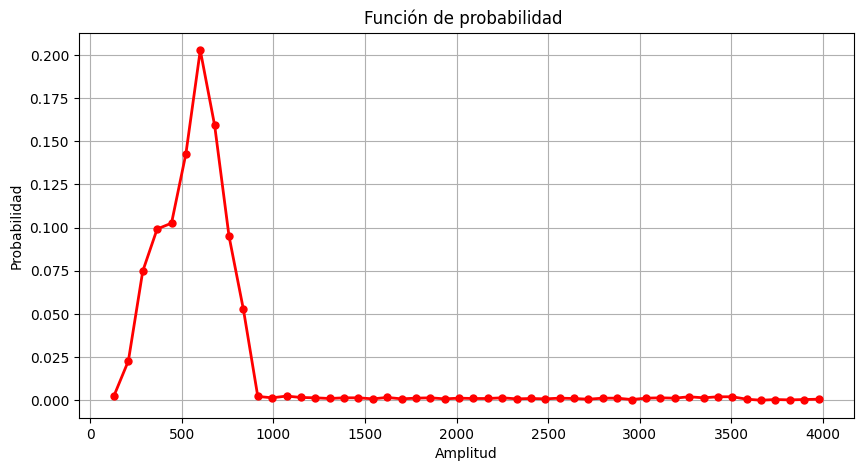

In [42]:
conteo, bins=np.histogram(señal, bins=50, density=True)
pdf=conteo/np.sum(conteo)
plt.figure(figsize=(10,5))
plt.plot(bins[:-1], pdf, 'r-', linewidth=2)
plt.plot(bins[:-1], pdf, 'ro', markersize=5)
plt.title("Función de probabilidad ")
plt.xlabel("Amplitud")
plt.ylabel("Probabilidad")
plt.grid(True)
plt.show()

# PARTE B

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

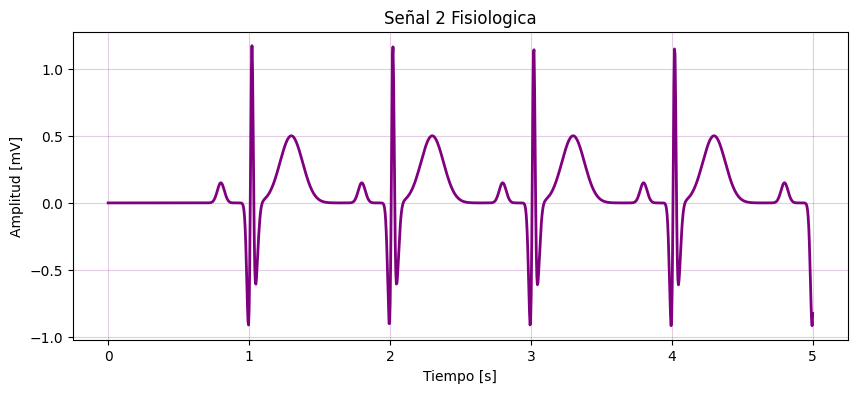

In [82]:
fs=250
t=np.linspace(0, 5, fs*5)
def gauss(t, mu, sigma, A):
    return A*np.exp(-0.5*((t-mu)/sigma)**2)
ecg=np.zeros_like(t)
for beat in range(1, 6):
    t0=beat
    ecg+=gauss(t, t0-0.2, 0.025, 0.15)
    ecg+=gauss(t, t0, 0.015, -1.0)
    ecg+=gauss(t, t0+0.02, 0.01, 2.0)
    ecg+=gauss(t, t0+0.04, 0.02, -0.7)
    ecg+=gauss(t, t0+0.3, 0.08, 0.5)
    plt.figure(figsize=(10,4))
plt.plot(t, ecg, color="purple", linewidth=2)
plt.title("Señal 2 Fisiologica")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [mV]")
plt.grid(True, color="purple", alpha=0.2)
plt.show()

In [60]:
N=len(ecg)
suma=0
for valor in ecg:
    suma+=valor
media_ecg=suma/N
suma_cuadrads=0
for valor in señal:
    suma+=(valor-media_ecg)**2
desv_manual=(suma/(N-1))**0.5
coef_var_manual=(desv_manual/media_ecg)*100
suma_var=0
for valor in ecg:
    suma_var+=(valor-media_ecg)**2
varianza=suma_var/N
suma_curtosis=0
for valor in ecg:
    suma_curtosis+=(valor-media_ecg)**4
curtosis=(suma_curtosis/N)/(varianza**2)


print("Estadísticos de la señal 2")
print(f"Media: {media:}")
print(f"Mediana: {mediana:}")
print(f"Máximo: {maximo:}")
print(f"Mínimo: {minimo:}")
print(f"Desviación estándar: {desviacion:}")
print(f"Varianza: {varianza:}")
print(f"Coeficiente de variación (%):{coef_var_manual}")
print(f"Curtosis:{curtosis}")

Estadísticos de la señal ECG simulada:
Media: 0.06750263705498454
Mediana: 0.0060858550601700905
Máximo: 1.1708169328800229
Mínimo: -0.9146882525578052
Desviación estándar: 0.24268443135312792
Varianza: 0.05889573322119112
Coeficiente de variación (%):[2365890.14423431]
Curtosis:8.033885588080576


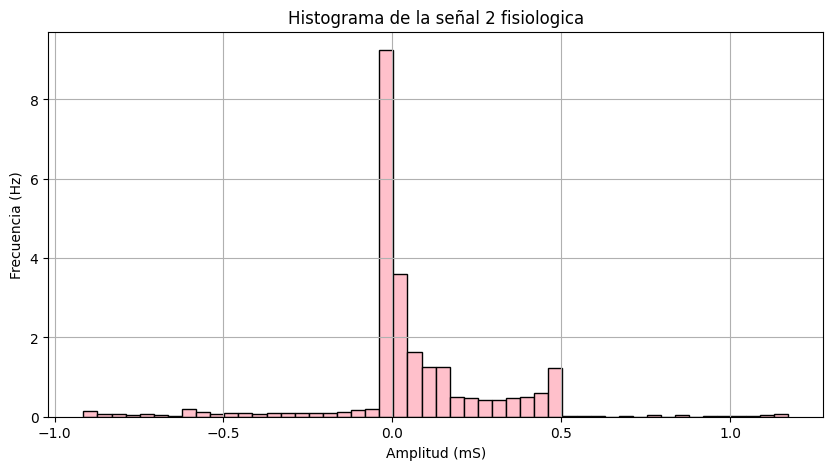

In [63]:
plt.figure(figsize=(10,5))
plt.hist(ecg, bins=50, color='pink', edgecolor='black', density=True)
plt.title("Histograma de la señal 2 fisiologica")
plt.xlabel("Amplitud (mS)")
plt.ylabel("Frecuencia (Hz)")
plt.grid(True)
plt.show()

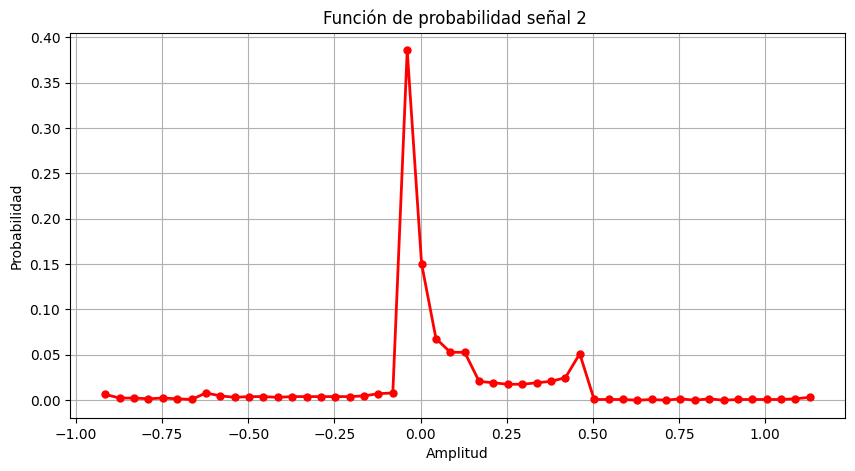

In [88]:
conteo, bins=np.histogram(ecg, bins=50, density=True)
pdf=conteo/np.sum(conteo)
plt.figure(figsize=(10,5))
plt.plot(bins[:-1], pdf, 'r-', linewidth=2)
plt.plot(bins[:-1], pdf, 'ro', markersize=5)
plt.title("Función de probabilidad señal 2 ")
plt.xlabel("Amplitud")
plt.ylabel("Probabilidad")
plt.grid(True)
plt.show()

# PARTE C

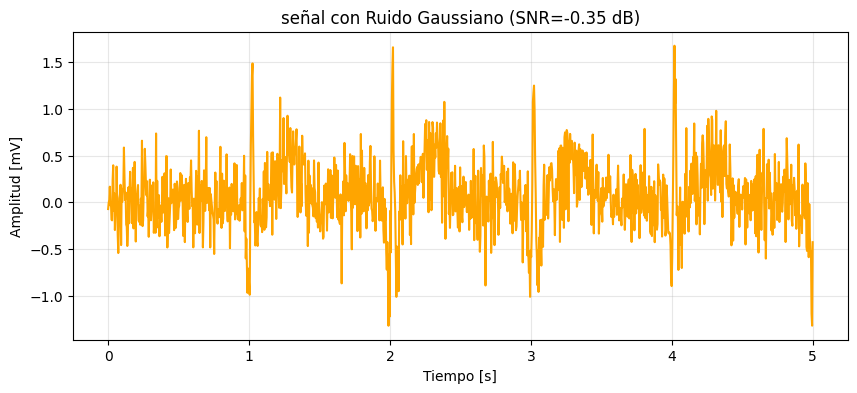

In [84]:
sigma_gauss=0.25
ruido_gauss=np.random.normal(0, sigma_gauss, len(t))
ecg_gauss=ecg+ruido_gauss
snr_gauss=calcular_SNR(ecg, ecg_gauss)
plt.figure(figsize=(10,4))
plt.plot(t, ecg_gauss, color="orange")
plt.title(f"señal con Ruido Gaussiano (SNR={snr_gauss:.2f} dB)")
plt.xlabel("Tiempo [s]"); plt.ylabel("Amplitud [mV]")
plt.grid(True, alpha=0.3)
plt.show()

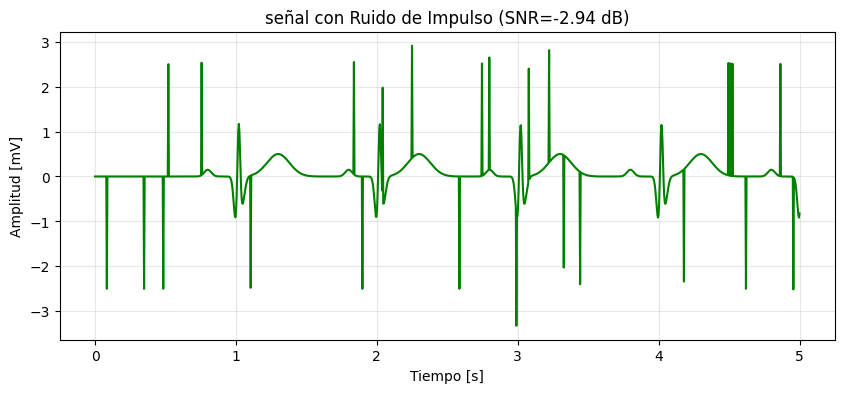

In [85]:
ecg_impulso=ecg.copy()
num_impulsos=25
np.random.seed(42)
for _ in range(num_impulsos):
    idx=np.random.randint(0, len(t))
    ecg_impulso[idx]+=np.random.choice([-2.5, 2.5])
snr_impulso=calcular_SNR(ecg, ecg_impulso)
plt.figure(figsize=(10,4))
plt.plot(t, ecg_impulso, color="green")
plt.title(f"señal con Ruido de Impulso (SNR={snr_impulso:.2f} dB)")
plt.xlabel("Tiempo [s]"); plt.ylabel("Amplitud [mV]")
plt.grid(True, alpha=0.3)
plt.show()

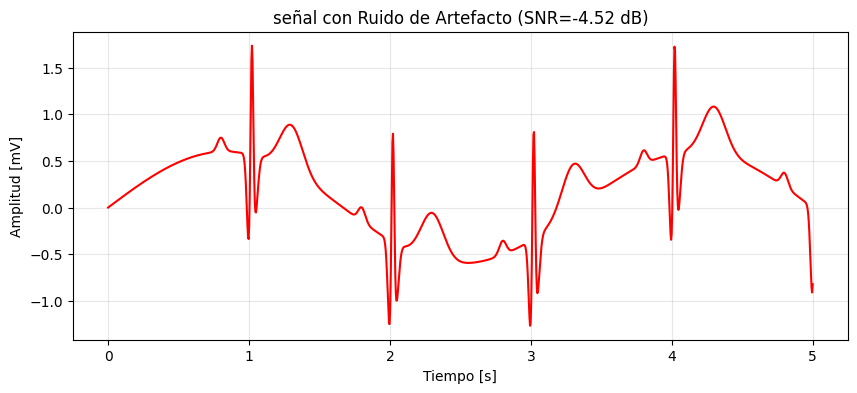

In [86]:
freq_art=0.3
amp_art=0.6
ruido_art=amp_art*np.sin(2*np.pi*freq_art*t)
ecg_art=ecg+ruido_art
snr_art=calcular_SNR(ecg, ecg_art)
plt.figure(figsize=(10,4))
plt.plot(t, ecg_art, color="red")
plt.title(f"señal con Ruido de Artefacto (SNR={snr_art:.2f} dB)")
plt.xlabel("Tiempo [s]"); plt.ylabel("Amplitud [mV]")
plt.grid(True, alpha=0.3)
plt.show()

In [81]:
def calcular_SNR(original, contaminada):
    pot_signal=0
    for x in original:
        pot_signal+=x**2
    pot_signal/=len(original)

    pot_noise=0
    for i in range(len(original)):
        pot_noise+=(contaminada[i] - original[i])**2
    pot_noise/=len(original)

    SNR=10*np.log10(pot_signal/pot_noise)
    return SNR
    print("Resultados de SNR (dB):")
print(f"Ruido Gaussiano: {snr_gauss:} dB")
print(f"Ruido Impulso:   {snr_impulso:} dB")
print(f"Ruido Artefacto: {snr_art:} dB")

Ruido Gaussiano: -0.34690904436174197 dB
Ruido Impulso:   -2.94462375604898 dB
Ruido Artefacto: -4.524772930662265 dB
